In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

import warnings
warnings.filterwarnings('ignore')

In [2]:
#%%time

# Load S&P 500 dataset over a 5 year period from Yahoo Finance
df = pd.read_csv('SP500.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000


In [3]:
series = df['Adj Close'][29:]
X = series.values

# Split X into train and test sets
test_size = 10
train_end = len(X) - test_size

X_train = X[:train_end]
X_test = X[train_end:]

# Create train, validation, and test sets
#train_end = int(len(X) - 40)
#valid_end = int(len(X) - 20)
#train, valid, test = X[0:train_end], X[train_end:valid_end], X[valid_end:]
#train_all = X[0:valid_end]

In [4]:
# Cross validation setup
def cross_validation(n):
    n_fold = n
    fold_size = len(X_train)/n_fold
    holdout_size = test_size
    fold_no = [x+1 for x in list(range(n_fold))]
    return n_fold, fold_size, holdout_size, fold_no

In [5]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(dataset1, dataset2, arima_order):
    train = [x for x in dataset1]
    
    # make predictions
    predictions = list()
    for t in range(len(dataset2)):
        model = ARIMA(train, order = arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        train.append(yhat) # we use our new prediction to train the model again
    
    # calculate out of sample error
    #error = mean_squared_error(dataset2, predictions)
    error = mean_absolute_percentage_error(dataset2, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(set1, set2, p_values, d_values, q_values):
    set1 = set1.astype('float32')
    set2 = set2.astype('float32')
    best_score, best_set = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mape = evaluate_arima_model(set1, set2, order)
          #      print('mse = ', mse)
                    if mape < best_score:
                        best_score, best_set = mape, order
                    print('ARIMA%s MAPE=%.3f' % (order,mape))
                except:
                    continue
    print('Best ARIMA%s MAPE=%.3f' % (best_set, best_score))

In [6]:
n_fold, fold_size, holdout_size, fold_no = cross_validation(10)

In [8]:
# evaluate parameters
p_values = [10]
d_values = [1]
q_values = [1]

best_score = float("inf")

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            mape_cv = 0.
            cnt = 0
            
            for f in fold_no:
                fold_end = np.int(fold_size*f)
                set1 = X_train[:(fold_end-holdout_size)].astype('float32')
                set2 = X_train[(fold_end-holdout_size):(fold_end)].astype('float32')
                try:
                    mape = evaluate_arima_model(set1, set2, order)
                    mape_cv += mape
                    cnt += 1
                except:
                    continue
            if(cnt == fold_no):        
                mape_cv = mape_cv/cnt
            else:
                print(order, cnt)
                
            if (mape_cv < best_score and cnt == fold_no):
                best_score = mape_cv
                best_set = order
                
print('best_score', best_score)
print('best_set', best_set)

(10, 1, 1) 0
best_score inf


NameError: name 'best_set' is not defined

In [49]:

 


warnings.filterwarnings("ignore")
evaluate_models(train, valid, p_values, d_values, q_values)

ARIMA(0, 0, 0) MAPE=18.210
ARIMA(0, 0, 1) MAPE=17.631
ARIMA(0, 1, 0) MAPE=2.303
ARIMA(0, 1, 1) MAPE=2.299
ARIMA(0, 1, 2) MAPE=2.286
ARIMA(0, 2, 0) MAPE=4.282
ARIMA(0, 2, 1) MAPE=2.436
ARIMA(1, 0, 0) MAPE=1.803
ARIMA(1, 0, 1) MAPE=1.807
ARIMA(1, 0, 2) MAPE=1.808
ARIMA(1, 1, 0) MAPE=2.300
ARIMA(1, 2, 0) MAPE=4.285
ARIMA(1, 2, 1) MAPE=2.433
ARIMA(1, 2, 2) MAPE=2.440
ARIMA(2, 0, 0) MAPE=1.807
ARIMA(2, 0, 2) MAPE=1.838
ARIMA(2, 1, 0) MAPE=2.288
ARIMA(2, 1, 1) MAPE=2.290
ARIMA(2, 2, 0) MAPE=3.849
ARIMA(2, 2, 1) MAPE=2.422
ARIMA(2, 2, 2) MAPE=2.423
ARIMA(4, 0, 1) MAPE=1.848
ARIMA(4, 0, 2) MAPE=1.944
ARIMA(4, 1, 0) MAPE=2.235
ARIMA(4, 1, 1) MAPE=1.980
ARIMA(4, 1, 2) MAPE=2.257
ARIMA(4, 2, 0) MAPE=5.429
ARIMA(4, 2, 1) MAPE=2.370
ARIMA(4, 2, 2) MAPE=2.461
ARIMA(6, 0, 0) MAPE=1.729
ARIMA(6, 0, 1) MAPE=1.706
ARIMA(6, 0, 2) MAPE=1.927
ARIMA(6, 1, 0) MAPE=2.167
ARIMA(6, 1, 1) MAPE=2.151
ARIMA(6, 1, 2) MAPE=2.211
ARIMA(6, 2, 0) MAPE=5.589
ARIMA(6, 2, 1) MAPE=2.304
ARIMA(6, 2, 2) MAPE=2.287
ARIMA(8, 0

In [ ]:
test1 = test.tolist()
pred1 = [predictions[x][0] for x in range(len(predictions))]
mean_absolute_percentage_error(test1, pred1)

In [25]:
valid

array([2629.72998 , 2663.419922, 2672.629883, 2671.919922, 2697.790039,
       2723.070068, 2727.719971, 2730.129883, 2711.449951, 2722.459961,
       2720.129883, 2712.969971, 2733.01001 , 2724.439941, 2733.290039,
       2727.76001 , 2721.330078, 2689.860107, 2724.01001 , 2705.27002 ,
       2734.620117, 2746.870117, 2748.800049, 2772.350098, 2770.370117,
       2779.030029, 2782.      , 2786.850098, 2775.629883, 2782.48999 ,
       2779.659912, 2773.75    , 2762.590088, 2767.320068, 2749.76001 ,
       2754.879883, 2717.070068, 2723.060059, 2699.629883, 2716.310059,
       2718.370117, 2726.709961, 2713.219971, 2736.610107, 2759.820068,
       2784.169922, 2793.840088, 2774.02002 , 2798.290039, 2801.310059,
       2798.429932, 2809.550049, 2815.620117, 2804.48999 , 2801.830078,
       2806.97998 , 2820.399902, 2846.070068, 2837.439941, 2818.820068,
       2802.600098, 2816.290039, 2813.360107, 2827.219971, 2840.350098,
       2850.399902, 2858.449951, 2857.699951, 2853.580078, 2833.

In [26]:
predictions

NameError: name 'predictions' is not defined

Test MSE: 971.268


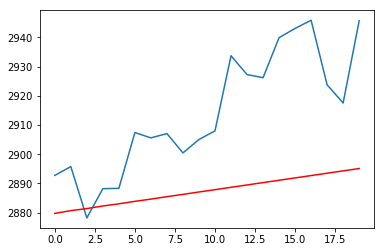

In [38]:
series = df['Adj Close']
X = series.values
size = int(len(X) - 20)
#train, test = X[0:size], X[size:len(X)]
history_1 = [x for x in train_all]
history_2 = [x for x in train_all]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history_1, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
#    print(output)
#    print('')
    yhat = output[0]
    predictions.append(yhat)
    history_1.append(yhat)
    obs = test[t]
    history_2.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [34]:
test1 = test.tolist()
pred1 = [predictions[x][0] for x in range(len(predictions))]
mean_absolute_percentage_error(test1, pred1)

5.35966332077513

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5505.140
Method:                       css-mle   S.D. of innovations             19.243
Date:                Sun, 18 Aug 2019   AIC                          11024.280
Time:                        18:37:01   BIC                          11060.241
Sample:                             1   HQIC                         11037.794
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8428      0.495      1.704      0.089      -0.127       1.812
ar.L1.D.Adj Close    -0.0161      0.028     -0.572      0.568      -0.071       0.039
ar.L2.D.Adj Close    -0.

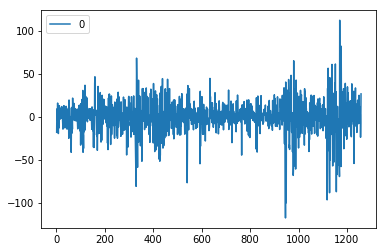

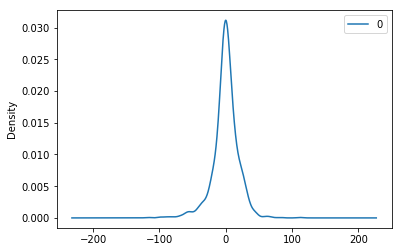

                 0
count  1258.000000
mean     -0.000302
std      19.250926
min    -117.192733
25%      -7.443717
50%       0.546700
75%       9.383209
max     112.319556


In [5]:
# fit model
series = df['Adj Close']
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 971.268


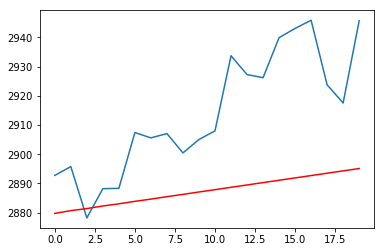

In [40]:
series = df['Adj Close']
X = series.values
size = int(len(X) - 20)
train, test = X[0:size], X[size:len(X)]
history_1 = [x for x in train]
history_2 = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history_1, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
#    print(output)
#    print('')
    yhat = output[0]
    predictions.append(yhat)
    history_1.append(yhat)
    obs = test[t]
    history_2.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [41]:
test1 = test.tolist()

In [42]:
pred1 = [predictions[x][0] for x in range(len(predictions))]

In [43]:
# Performance error
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#    return np.mean(np.abs((y_true - y_pred) ))

In [44]:
mean_absolute_percentage_error(test1, pred1)

0.9170102237571589

In [12]:
mean_squared_error(test,predictions)

219.2410157834648

#### Complete Arima Analysis

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

In [2]:
#%%time

# Load S&P 500 dataset over a 5 year period from Yahoo Finance
df_full = pd.read_csv('SP500.csv', index_col = 'Date')
df = df_full[['Adj Close']]
df.head()

,Adj Close
Date,
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005
2014-05-09,1878.479980


In [6]:
df.columns

Index(['Adj Close'], dtype='object')

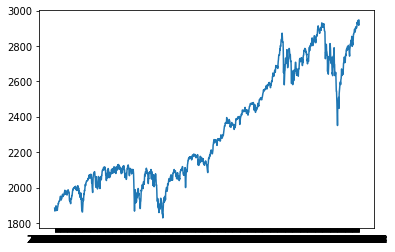

In [7]:
plt.plot(df)
plt.show()

In [20]:
def test_stationarity(timeseries, w):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=w).mean()
    rolstd = timeseries.rolling(window=w).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

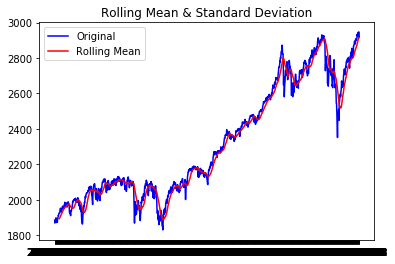

In [9]:
test_stationarity(df, 20)

In [10]:
def difference(dataset, interval=1):
    index = list(dataset.index)
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset['Adj Close'][i] - dataset['Adj Close'][i - interval]
        diff.append(value)
    return (diff)

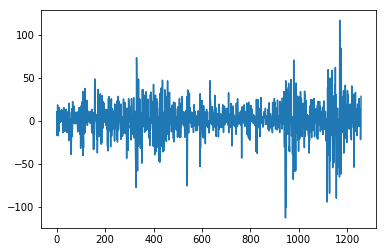

In [11]:
diff = difference(df)
plt.plot(diff)
plt.show()

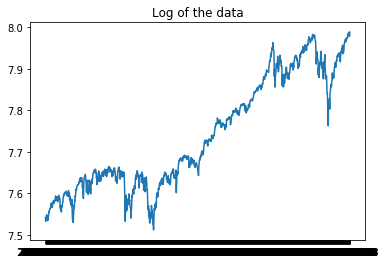

In [13]:
df_log = np.log(df)
plt.title('Log of the data')
plt.plot(df_log)
plt.show()

### Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 20 days. Pandas has specific functions defined for determining rolling statistics.

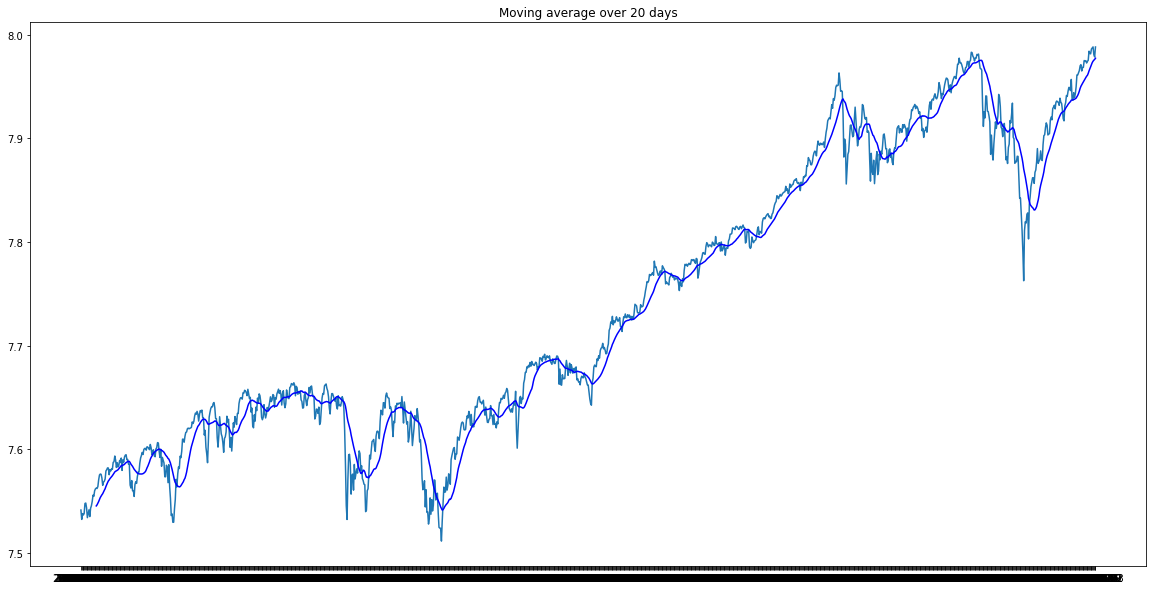

In [15]:
moving_avg = df_log.rolling(20).mean()

plt.figure(figsize=(20,10))
plt.plot(df_log)
plt.title('Moving average over 20 days')
plt.plot(moving_avg, color='blue')
plt.show()

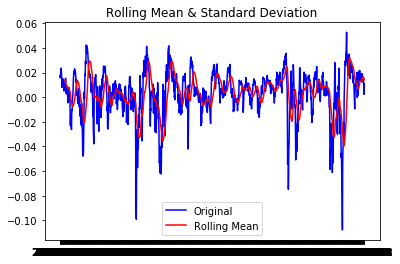

In [16]:
df_log_moving_avg_diff = df_log - moving_avg

df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff, 20)

#### Weighted Moving Average: 
Here more recent values are given a higher weight

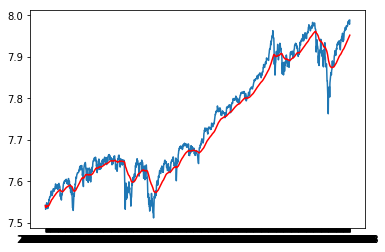

In [17]:
expwighted_avg = df_log.ewm(halflife=20).mean()
#parameter halflife is used to define the amount of exponential decay
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')
plt.show()

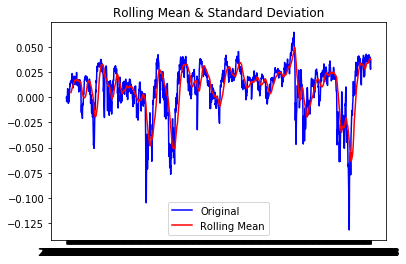

In [18]:
df_ewma_diff = df_log - expwighted_avg
test_stationarity(df_ewma_diff, 20)

#### Eliminating Trend and Seasonality

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

Differencing – taking the differece with a particular time lag

Decomposition – modeling both trend and seasonality and removing them from the model.

#### Differencing

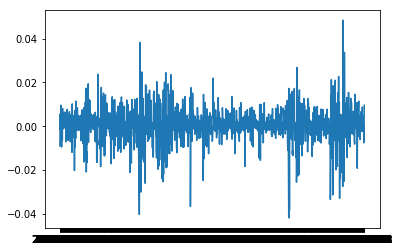

In [19]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)
plt.show()

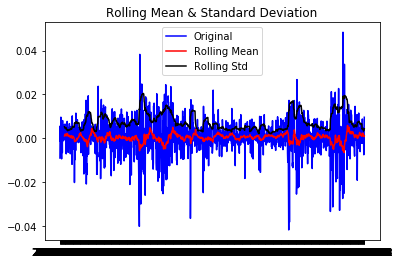

In [21]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff, 20)

#### Decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_log.reset_index(inplace=True)
df_log['Date'] = pd.to_datetime(df_log['Date'])
df_log = df_log.set_index('Date')
#df.index.asfreq(freq='m')

decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [24]:
df_log.index

DatetimeIndex(['2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08',
               '2014-05-09', '2014-05-12', '2014-05-13', '2014-05-14',
               '2014-05-15', '2014-05-16',
               ...
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

* Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

* Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

* Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

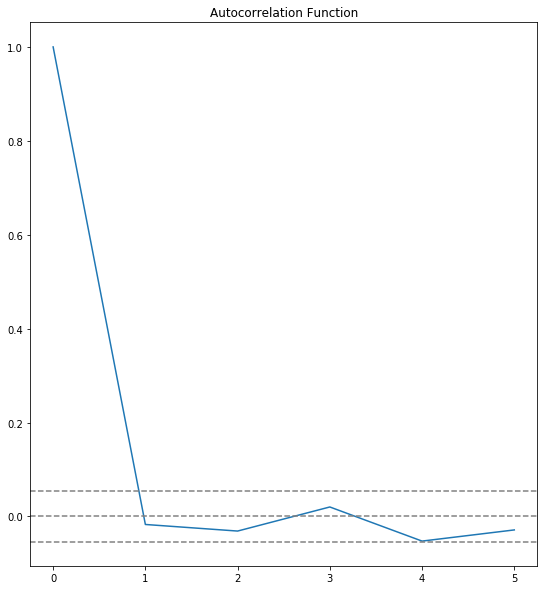

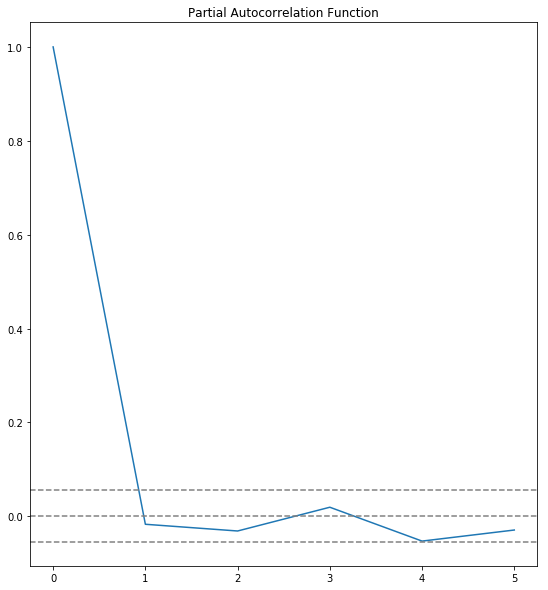

<Figure size 432x288 with 0 Axes>

In [30]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_log_diff, nlags=5)
lag_pacf = pacf(df_log_diff, nlags=5, method='ols')

plt.figure(figsize = (20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize = (20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()